In [60]:
import pandas as pd

import numpy as np

from collections import Counter

import seaborn as sns

import matplotlib.pyplot as plt

In [68]:
def descriptive_statistics(data):
    data = np.array(data)

    print("Mean: ", data.mean())
    print("Min: ", data.min())
    print("Max: ", data.max())

    print("Median: ", np.median(data))
    print("SD: ", np.std(data, ddof=1))
    print("Lower quantile: ", np.quantile(data, 0.025))
    print("Upper quantile: ", np.quantile(data, 0.975))




In [2]:
df = pd.read_csv("../../data/cleaned_filtered_dataset_nans.csv")

In [55]:
len(df)

398827

In [56]:
teams = set(winners) | set(losers)

In [57]:
len(teams)

16912

In [26]:
winners = df["Winner"].tolist()
losers = df["Loser"].tolist()

In [27]:
winner_count = Counter(winners)

In [28]:
loser_count = Counter(losers)

In [30]:
win_loss_ratio = dict()

In [31]:
for key in winner_count:
    win_loss_ratio[key] = winner_count[key]/(winner_count[key] + loser_count[key])

In [69]:
descriptive_statistics(list(win_loss_ratio.values()))

Mean:  0.4531795816678733
Min:  0.017241379310344827
Max:  1.0
Median:  0.4318181818181818
SD:  0.21998178137399121
Lower quantile:  0.1
Upper quantile:  1.0


Text(0.5, 1.0, 'Win Loss Ratio Distribution')

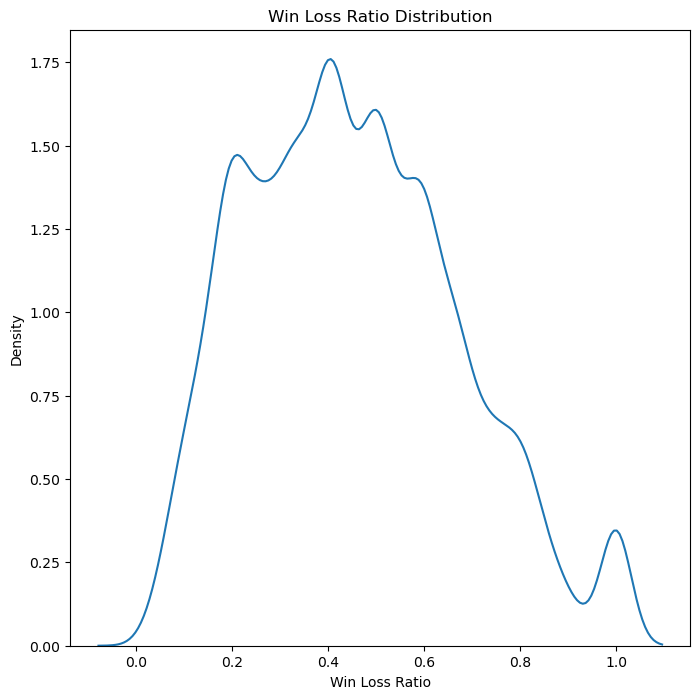

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(data = list(win_loss_ratio.values()), ax=ax)

ax.set_xlabel("Win Loss Ratio")
ax.set_ylabel("Density")
ax.set_title("Win Loss Ratio Distribution")

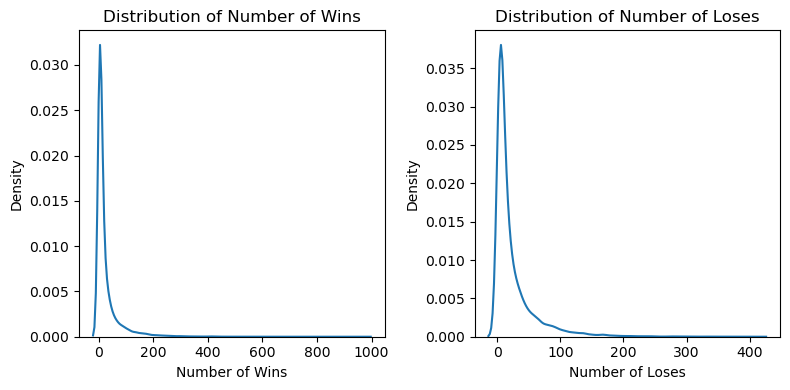

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.kdeplot(data = list(winner_count.values()), ax=axs[0])
sns.kdeplot(data = list(loser_count.values()), ax=axs[1])

axs[0].set_xlabel("Number of Wins")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution of Number of Wins")

axs[1].set_xlabel("Number of Loses")
axs[1].set_ylabel("Density")
axs[1].set_title("Distribution of Number of Loses")

fig.tight_layout()

In [70]:
descriptive_statistics(list(winner_count.values()))

Mean:  26.021204410517388
Min:  1
Max:  975
Median:  8.0
SD:  50.08497288845249
Lower quantile:  1.0
Upper quantile:  167.0


In [71]:
descriptive_statistics(list(loser_count.values()))

Mean:  24.178660200060623
Min:  1
Max:  411
Median:  11.0
SD:  35.09705271839834
Lower quantile:  1.0
Upper quantile:  125.0


In [53]:
total_games = dict()
for key in winner_count:
    total_games[key] = winner_count[key] + loser_count[key]

In [72]:
descriptive_statistics(list(total_games.values()))

Mean:  51.40014353754812
Min:  1
Max:  1085
Median:  21.0
SD:  80.28109176110503
Lower quantile:  4.0
Upper quantile:  278.0


Text(0.5, 1.0, 'Distributon of Total Number of Games Played')

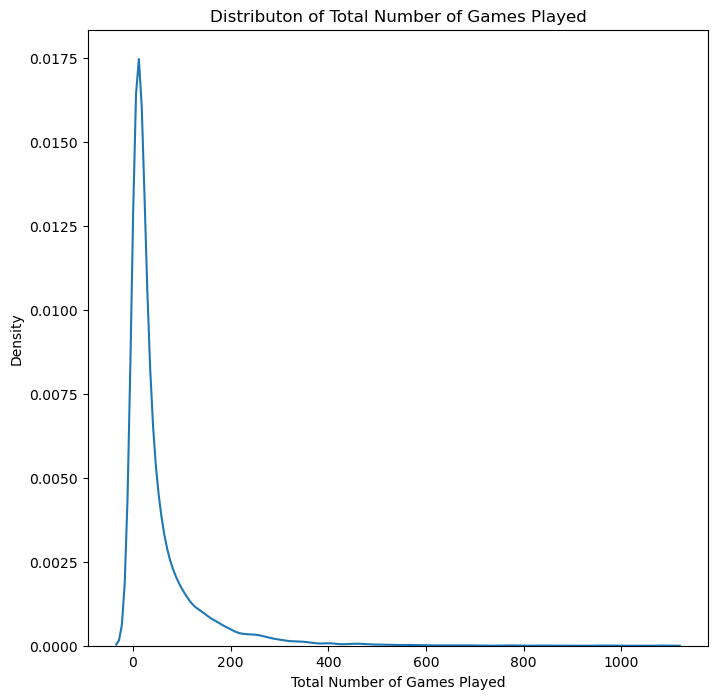

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(data = list(total_games.values()), ax=ax)

ax.set_xlabel("Total Number of Games Played")
ax.set_ylabel("Density")
ax.set_title("Distributon of Total Number of Games Played")

# Graph Visualization (Uses external tool cosmograph)

In [40]:
pd.DataFrame({"source" : winners, "target": losers}).to_csv("../../data/graph.csv", index=False)